In [26]:
import math

import random

import matplotlib.pyplot as plt

import numpy as np

import pylab

import csv

import scipy as sp

import scipy.interpolate 

from scipy.interpolate import interp1d

from scipy.interpolate import splrep

from scipy.interpolate import splev

%matplotlib inline

In [6]:
i = 1
Garray = [0]
N = 100     #Number of trials

a1 = 1.6  #length of detector 1
a2 = 1.6  #length of detector 2
b1 = 1.6  #width of detector 1
b2 = 1.6  #width of detector 2
l = 2.3   #space in between the detectors

for i in range(1,N):
    #N = 10000 #Sample Size

    z = 0       #array variable

    phi = []  #Values of phi

    cos = []  #Values of Cos(theta)

    theta = []    #Values of theta

    I = []

    for z in range(0, i):
        k = random.uniform(0,6.2831853071796)
        phi.append(k)
        I.append(z)
        z = z + 1
    #print(I)


    for z in range(0, i):
        k = random.uniform(0,1)
        cos.append(k)
        theta.append(math.acos(k))
        z = z + 1
    
    #print(phi)
    #print(theta)

    #plt.hist(phi)
    

    z = 0     #loop variable 
    A = []    #Directional Response Variable
    for z in range(0,i):
    
    #The following for loop calculates Directional Response for all values of phi and and theta created above. All of which is 
    #dictated by the fact that the fact that both detectors are taken to be square and identical. An array, A, is made based on 
    #full of all the possible values
    
    
        alpha = (1/2) * (a1 + a2)
        beta = (1/2) * (b1 + b2)
        gamma = (1/2) * (a1 - a2)
        delta = (1/2) * (b1 - b2)
        zeta = (-l*(math.tan(theta[z]))*(math.cos(phi[z])))
        nu = (-l*(math.tan(theta[z]))*(math.sin(phi[z])))
        j = gamma + zeta
        k = gamma - zeta
        m = delta + nu
        n = delta - nu
        if j > 0:
            Hj = 1
        else:
            Hj = 0
        if k > 0:
            Hk = 1
        else:
            Hk = 0
    
        if m > 0:
            Hm = 1
        else:
            Hm = 0
        if n > 0:
            Hn = 1
        else:
            Hn = 0
    
        X = a2-j*Hj-k*Hk
        Y = b2-m*Hm-n*Hn


        if X > 0:
            HX = 1
        else:
            HX = 0
        if Y > 0:
            HY = 1
        else:
            HY = 0

        U = X*HX*Y*HY
        A.append(U)
        z = z + 1

    z = 0

    Apos = []
    #print(Apos)
    for z in range(0,len(A)):
    
    #This for loop takes all non zero values of A and creates a new array, Apos, of only those directional response numbers    
    
        if A[z] > 0:
            Apos.append(A[z])
            z = z + 1
            
    A1 = a1 * b1
    A2 = a2 * b2

    MaxG = A1*A2/pow(l,2)
    MinG = MaxG*(1-((pow(a1,2)+pow(a2,2)+pow(b1,2)+pow(b2,2))/(6*pow(l,2))))

    #print('Because our two detectors are both square and identical we can approximate G to be within the range:')
    #print(MaxG,'>= G >=',MinG)           
    
    
    
    dw = (abs(0-6.2831853)*abs(0-1))/i
    z = 0
    G = 0
    
    for z in range(0,i):
        G = G + (A[z]*dw)
        z = z + 1
    Garray.append(G)
    i = i + 10
#print(Garray)

1.2388657844990556
0.8391812969984149


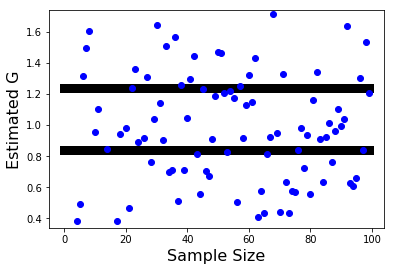

In [7]:
x = np.arange(0,N)
y_max = MaxG + 0*x
y_min = MinG + 0*x
plt.plot(x, y_max, 'k', lw = 9)
plt.plot(x, y_min, 'k', lw = 9)
plt.plot(x, Garray, 'ob')
pylab.ylim(MinG - 0.5, MaxG + 0.5)
plt.xlabel('Sample Size', fontsize = 16)
plt.ylabel('Estimated G', fontsize = 16)
print(MaxG)
print(MinG)


In [8]:
with open('Beryllium.csv',newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    x = []
    y = []
    ty = []
    iy = []
    for row in reader:
        #print(row['Energy'],row['dN/dE*10^-4'],row['dN/dE'],row['E*dN/dE'])
        x.append(row['Energy(GeV)'])
        y.append(row['dN/dE*10^-4'])
        ty.append(row['dN/dE'])
        iy.append(row['E*dN/dE'])
    #print(ty)
    

In [9]:
x = np.array(x,dtype=float)
y = np.array(y,dtype=float)
ty = np.array(ty,dtype=float)
iy = np.array(iy,dtype=float)

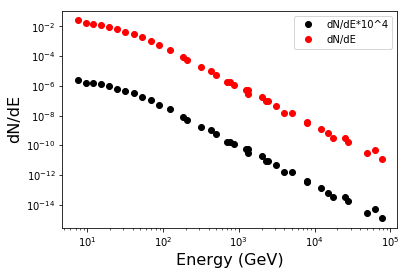

In [10]:
plt.loglog(x, y, 'ok', label='dN/dE*10^4')
plt.xlabel('Energy (GeV)',fontsize=16)
plt.ylabel('dN/dE', fontsize=16)
#plt.title('Carbon * 10^-4')

plt.loglog(x,ty,'or', label='dN/dE')

dlogE = abs(5-1)/len(x)

#plt.loglog(x,iy,'ob', label= 'E*dN/dE')

plt.legend(loc = 'upper right')

plt.show()


#print(ty)
#print(len(ty))
#print(len(x))


Text(0, 0.5, 'E*dN/dE')

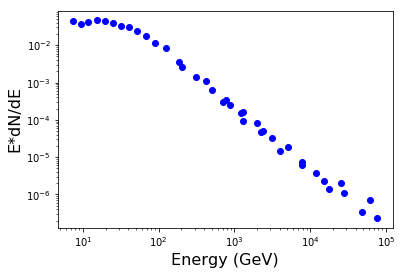

In [11]:
plt.loglog(x,iy,'ob',label = 'E*dN/dE')

plt.xlabel('Energy (GeV)', fontsize = 16)
plt.ylabel('E*dN/dE', fontsize = 16)

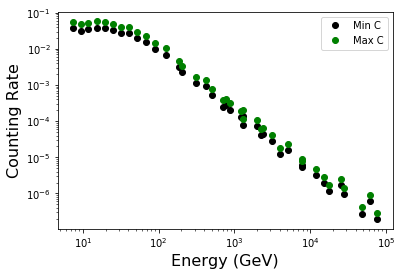

In [12]:
iy_low=[]
iy_high=[]

for i in range(0,len(iy)):
    iy_low.append(iy[i]*MinG)
    iy_high.append(iy[i]*MaxG)

plt.loglog(x,iy_low,'ok',label='Min C')
plt.loglog(x,iy_high,'og',label='Max C')
plt.xlabel('Energy (GeV)', fontsize = 16)
plt.ylabel('Counting Rate',fontsize=16)
plt.legend(loc='upper right')
#plt.ylim([math.pow(10,-2),10])

In [13]:
#Evaluate integral for total number of events and find amount per week because helix is up for about a week.
#Figure out a way to compute logarithmic integral with arrays.
#If they don't have a logarithmic scale integration in numpy then take the log base 10 of energy and do the integration.
#Do this for both the max and min C (Should be in the range of around 1000)
#Fit function by first interpalating the function and then spline ev and spline interpalate.
X = np.log10(x)
Y = np.log10(iy)

In [14]:
X=np.log10(x)
Y=np.log10(iy)

[0.87197353 0.9794755  1.07353972 1.18104168 1.28854365 1.39604561
 1.50354758 1.61104954 1.71855151 1.83949122 1.94699318 2.09480838
 2.26949908 2.30981231 2.49794075 2.63231821 2.69950694 2.84732214
 2.88763538 2.94138636 3.08920156 3.11607705 3.11607707 3.30420549
 3.35795647 3.38483196 3.49233393 3.59983589 3.70733786 3.8954663
 3.89546632 4.08359474 4.17765896 4.24484768 4.40610063 4.44641387
 4.68829329 4.79579525 4.88985947]
[-1.34789584 -1.41817165 -1.38336669 -1.33512399 -1.34614054 -1.41641635
 -1.48669217 -1.49770872 -1.62724379 -1.74334112 -1.93213545 -2.08061654
 -2.43925918 -2.57672373 -2.86266936 -2.96532894 -3.19443651 -3.52069538
 -3.48038215 -3.60440894 -3.81214929 -3.7852738  -4.02231084 -4.07121944
 -4.31376475 -4.28688926 -4.47568359 -4.8422557  -4.73475374 -5.19847715
 -5.13921789 -5.42516353 -5.6273956  -5.85650317 -5.69525022 -5.95123328
 -6.47972423 -6.13518523 -6.6337136 ]


Text(0, 0.5, 'log10 of Counting Rate')

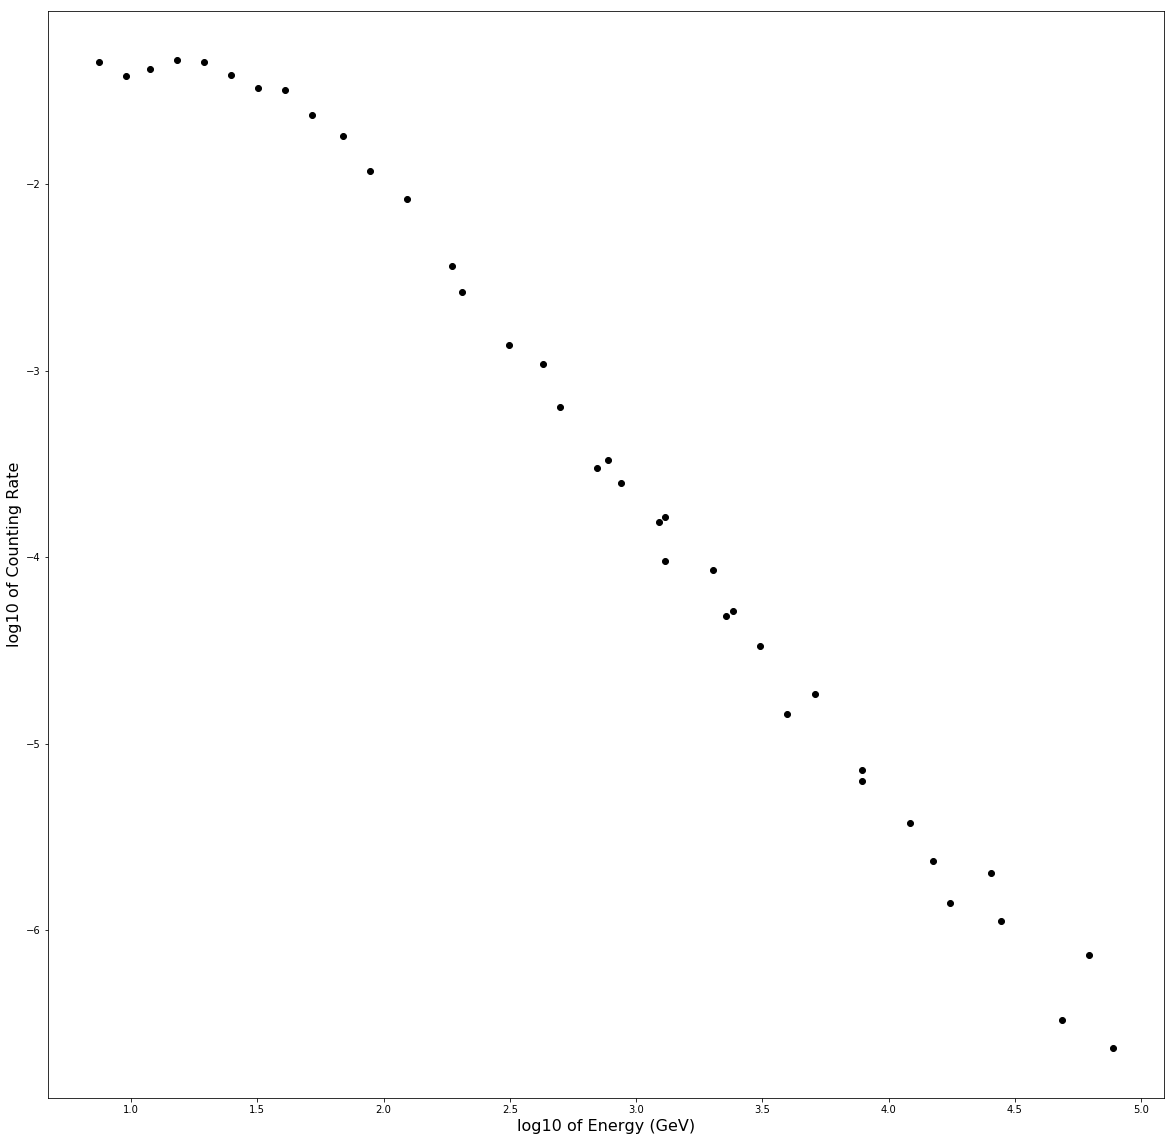

In [19]:
for i in range(0,len(X)-1):
    if X[i]>=X[i+1]:
        print(i)
print(X)
#22
#30
X[22]=X[22]+.00000001
X[30]=X[30]+.00000001
x[22]=x[22]+.00000001
x[30]=x[30]+.00000001
print(Y)
plt.plot(X,Y,'ok')
plt.xlabel('log10 of Energy (GeV)', fontsize = 16)
plt.ylabel('log10 of Counting Rate',fontsize=16)

In [29]:
tckA, fpA, ierA, msgA= splrep(X, Y, s=1, full_output=True)
spline=splev(X, tckA, der=0)
print (spline)
#xnew = np.linspace(X[0],X[-1], num = 1000, endpoint=True)
#f = interp1d(X,Y,kind='linear')
#print(xnew)
#print(f(xnew))
#print(Y)

[-1.31871421 -1.31081311 -1.31929447 -1.34576057 -1.38924225 -1.44882571
 -1.52359717 -1.61264283 -1.71504887 -1.84508774 -1.97285053 -2.1654902
 -2.41551238 -2.47626386 -2.77278988 -2.99579517 -3.11015115 -3.36706896
 -3.43817311 -3.53351918 -3.79802266 -3.84634542 -3.84634548 -4.18479786
 -4.28113228 -4.32916705 -4.52009005 -4.70838198 -4.89312904 -5.20515805
 -5.20515809 -5.49863501 -5.63688604 -5.73170847 -5.94446972 -5.99412483
 -6.25864932 -6.35603924 -6.43003946]


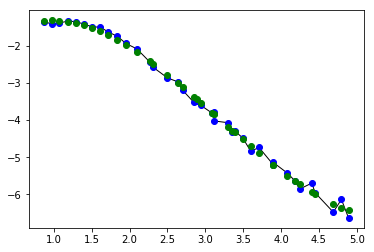

In [30]:
plt.plot(xnew,f(xnew),'k',linewidth = 1)
plt.plot(X,Y,'ob', label='data')
plt.plot(X, spline, 'og', label='spline')
plt.rcParams["figure.figsize"] = [20,20]
plt.show()

